## Corona Deaths Prediction

This file will predict based on Machine Learning the change of the amount of deaths based on the given CSV file from the Windesheim in Almere. Aaron Weggemans & Tuan Nguyen are the contributors of this application. 

Tuan, wat ik nog moet nog zijn de predictions, die zijn opzich niet heel gigantisch lastig, alleen komt mijn data nog niet helemaal. Er zijn wat vreemde velden qua informatie wat ik terug krijg. Hier wil ik nog aan werken. 

In [7]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [8]:
# Retrieves information form start date 2019 to 2021
start_date = dt.datetime(2019, 1, 1)
end_date =  dt.datetime(2021, 1, 1)

uncutted_df = pd.read_csv("files/Case_PRB.csv", sep=",", parse_dates=['date'], dayfirst=True)
date_mask = (uncutted_df['date'] > start_date) & (uncutted_df['date'] <= end_date)
country_mask = (uncutted_df['location'] == "Netherlands")

filter_on_date = uncutted_df.loc[date_mask]
df = filter_on_date.loc[country_mask]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['total_cases'].values.reshape(-1, 1))

prediction_days = 60

x_train = []
y_train = []

# Tuan hier moeten we nog wat data processed saus doen, omdat ik vet rare waardes terug krij
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x - prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(x_train)

[[[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [5.73230152e-06]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  ...
  [0.00000000e+00]
  [5.73230152e-06]
  [1.14646030e-05]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  ...
  [5.73230152e-06]
  [1.14646030e-05]
  [4.01261106e-05]]

 ...

 [[3.39002580e-01]
  [3.43468042e-01]
  [3.47216968e-01]
  ...
  [8.30255087e-01]
  [8.58796217e-01]
  [8.92118085e-01]]

 [[3.43468042e-01]
  [3.47216968e-01]
  [3.50524506e-01]
  ...
  [8.58796217e-01]
  [8.92118085e-01]
  [9.26276870e-01]]

 [[3.47216968e-01]
  [3.50524506e-01]
  [3.54170249e-01]
  ...
  [8.92118085e-01]
  [9.26276870e-01]
  [9.63496704e-01]]]


Right now we have preprocessed our data into the rows we want to use it for. Right now we want to train our model to recieve learn from our dataframe

In [10]:
trainingRows = 25
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=trainingRows, batch_size=32)


Train on 227 samples
Epoch 1/25
227/227 [==============================] - 4s 17ms/sample - loss: 0.0556
Epoch 2/25
227/227 [==============================] - 1s 3ms/sample - loss: 0.0186
Epoch 3/25
227/227 [==============================] - 1s 3ms/sample - loss: 0.0140
Epoch 4/25
227/227 [==============================] - 1s 3ms/sample - loss: 0.0074
Epoch 5/25
227/227 [==============================] - 1s 3ms/sample - loss: 0.0054
Epoch 6/25
227/227 [==============================] - 1s 3ms/sample - loss: 0.0039
Epoch 7/25
227/227 [==============================] - 1s 3ms/sample - loss: 0.0037
Epoch 8/25
227/227 [==============================] - 1s 3ms/sample - loss: 0.0031
Epoch 9/25
227/227 [==============================] - 1s 3ms/sample - loss: 0.0022
Epoch 10/25
227/227 [==============================] - 1s 4ms/sample - loss: 0.0036
Epoch 11/25
227/227 [==============================] - 1s 3ms/sample - loss: 0.0024
Epoch 12/25
227/227 [==============================] - 1s 4ms/s

Right now we want to retrieve the information, but then filtered on the information from the last moment until now

In [13]:
test_start = dt.datetime(2021, 1, 1)
test_end = dt.datetime.now()

uncutted_df = pd.read_csv("files/Case_PRB.csv", sep=",", parse_dates=['date'], dayfirst=True)
date_mask = (uncutted_df['date'] > start_date) & (uncutted_df['date'] <= end_date)
country_mask = (uncutted_df['location'] == "Netherlands")
filter_on_date = uncutted_df.loc[date_mask]
test_df = filter_on_date.loc[country_mask]

total_cases = test_df['total_cases'].values
total_dataset = pd.concat((df['total_cases'], test_df['total_cases']))
model_inputs = total_dataset[len(total_dataset) - len(test_df) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lets make a prediction on the test data

In [14]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x - prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_deaths = model.predict(x_test)
predicted_deaths = scaler.inverse_transform(predicted_deaths)

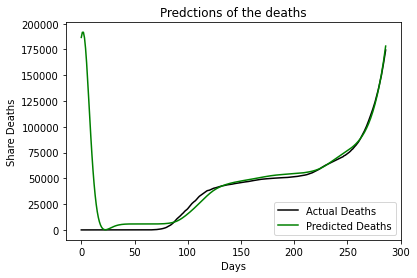

In [15]:
plt.plot(total_cases, color="black", label=f"Actual Deaths")
plt.plot(predicted_deaths, color="green", label=f"Predicted Deaths")
plt.title(f"Predctions of the deaths")
plt.xlabel("Days")
plt.ylabel(f"Share Deaths")
plt.legend()
plt.show()